In [93]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

In [103]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37]==x[27:41]:
            return x

In [132]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'
data = []
dataCM = []

CM = random.choice(os.listdir(pathCM))
file07 = None
file14 = None
while file07 == None or file14 == None:
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')
    
img07 = np.load(path + file07)
img14 = np.load(path + file14)
diff = img07 - img14
diffcm = diff.copy()
        
mask = np.load(pathCM + CM)
mask = mask.astype(bool)
diffcm[mask] = 0

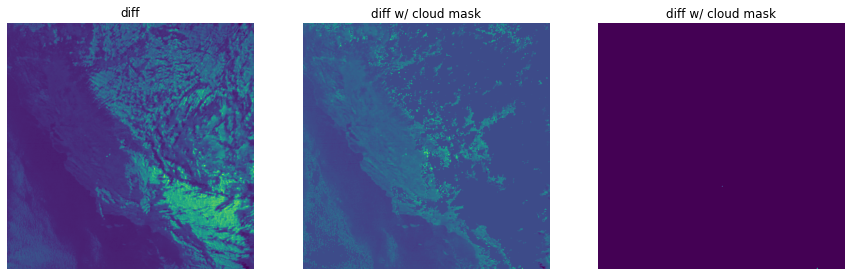

In [137]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(diff, aspect='equal')
ax[0].set_title('diff')
ax[0].axis('off')

ax[1].imshow(diffcm, aspect='equal')
ax[1].set_title('diff w/ cloud mask')
ax[1].axis('off')

ax[2].imshow(diffcm>10, aspect='equal')
ax[2].set_title('diff w/ cloud mask')
ax[2].axis('off')

plt.axis('off')
plt.show()

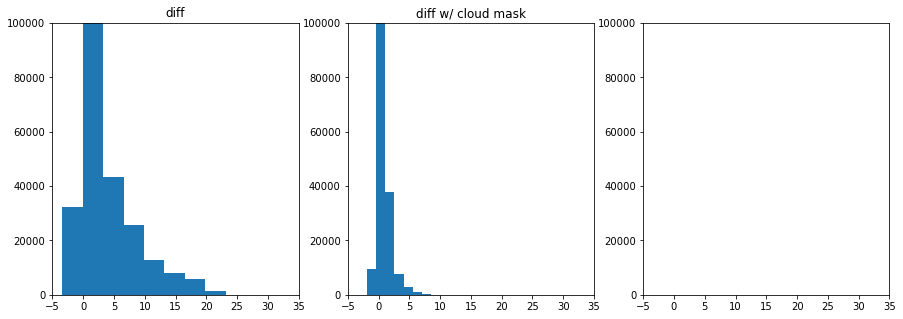

In [138]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(diff.ravel())
ax[0].set_title('diff')

ax[1].hist(diffcm.ravel())
ax[1].set_title('diff w/ cloud mask')

plt.setp(ax, xlim=(-5, 35), ylim=(0, 100000))
plt.show()

In [134]:
CM

'OR_ABI-L2-ACMC-M6_G17_s20183612345250_e20183612348023_c20183612348287.npy'

In [135]:
file07

'OR_ABI-L1b-RadC-M6C07_G17_s20183612345250_e20183612348034_c20183612348062.npy'

In [136]:
file14

'OR_ABI-L1b-RadC-M6C14_G17_s20183612345250_e20183612348023_c20183612348063.npy'